In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/byuidatascience/data4python4ds/master/data-raw/flights/flights.csv"
flights = pd.read_csv(url)

In [2]:
flights["dest"].count()

336776

In [3]:
flights["dest"].value_counts()

dest
ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
       ...  
MTJ       15
SBN       10
ANC        8
LEX        1
LGA        1
Name: count, Length: 105, dtype: int64

In [4]:
(
    flights.groupby(["dest"])
    .agg(
        mean_delay=("dep_delay", "mean"),
        count_flights=("dest", "count"),
    )
    .sort_values(by="count_flights", ascending=False)
)

,mean_delay,count_flights
dest,,
ORD,13.570484,17283
ATL,12.509824,17215
LAX,9.401344,16174
BOS,8.730613,15508
MCO,11.275998,14082
...,...,...
MTJ,17.642857,15
SBN,21.100000,10
ANC,12.875000,8


In [5]:
(flights.groupby("tailnum").agg(miles=("distance", "sum")))

,miles
tailnum,
D942DN,3418
N0EGMQ,250866
N10156,115966
N102UW,25722
N103US,24619
...,...
N997DL,54669
N998AT,15432
N998DL,66052


In [6]:
(flights.groupby("dest").agg(n_cancelled=("dep_time", lambda x: x.isnull().sum())))

,n_cancelled
dest,
ABQ,0
ACK,0
ALB,20
ANC,0
ATL,317
...,...
TPA,59
TUL,16
TVC,5


# Transformations

## 最大与最小

In [8]:
flights["distance"].max()

4983

In [9]:
df = pd.DataFrame({"x": [1, 5, 7], "y": [3, 2, pd.NA]})
df

,x,y
0,1,3
1,5,2
2,7,<NA>


In [10]:
# 按 row 查找最小
df.min(axis=1)

0    1
1    2
2    7
dtype: object

## 按模运算

In [11]:
print([x for x in range(1, 11)])
print("divided by 3 gives")
print("remainder:")
print([x % 3 for x in range(1, 11)])
print("divisions:")
print([x // 3 for x in range(1, 11)])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
divided by 3 gives
remainder:
[1, 2, 0, 1, 2, 0, 1, 2, 0, 1]
divisions:
[0, 0, 1, 1, 1, 2, 2, 2, 3, 3]


In [12]:
flights.assign(
    hour=lambda x: x["sched_dep_time"] // 100,
    minute=lambda x: x["sched_dep_time"] % 100,
)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z


## 对数

In [13]:
import numpy as np

starting = 100
interest = 1.05
money = pd.DataFrame(
    {"year": 2000 + np.arange(1, 51), "money": starting * interest ** np.arange(1, 51)}
)
money.head()

,year,money
0,2001,105.000000
1,2002,110.250000
2,2003,115.762500
3,2004,121.550625
4,2005,127.628156


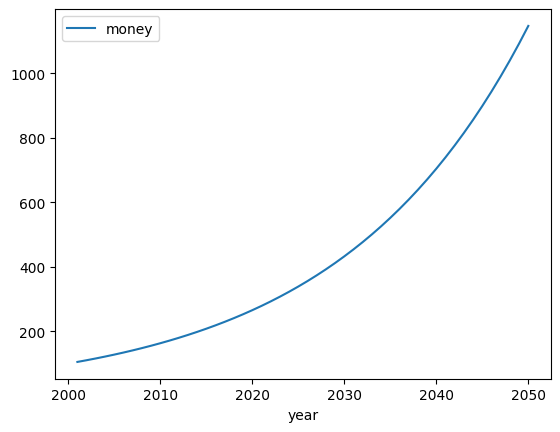

In [14]:
money.plot(x="year", y="money");

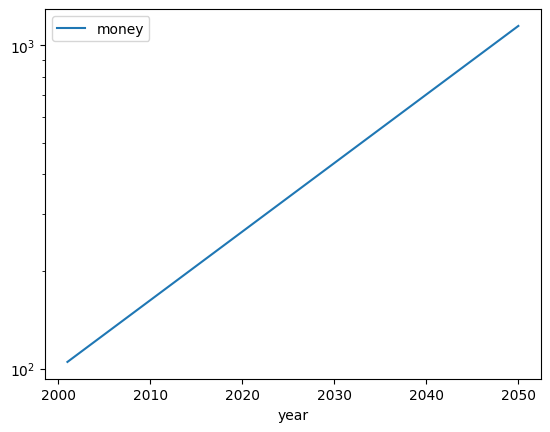

In [15]:
# log 会将轴变成直线
money.plot(x="year", y="money", logy=True);

# log(money) = log(starting) + n * log(interest)

## Rounding

In [16]:
money.head().round(2)

,year,money
0,2001,105.00
1,2002,110.25
2,2003,115.76
3,2004,121.55
4,2005,127.63


In [17]:
money.head().round({"year": 0, "money": 1})

,year,money
0,2001,105.0
1,2002,110.2
2,2003,115.8
3,2004,121.6
4,2005,127.6


In [18]:
# n = 2 时，将四舍五入到最接近的 0.01
# n = -2 时，将四舍五入到最接近的 100
money.tail().round({"year": 0, "money": -2})

,year,money
45,2046,900.0
46,2047,1000.0
47,2048,1000.0
48,2049,1100.0
49,2050,1100.0


In [19]:
money["money"].head()

0    105.000000
1    110.250000
2    115.762500
3    121.550625
4    127.628156
Name: money, dtype: float64

In [21]:
money["money"].head().apply(lambda x: float(f'{float(f"{x:.3g}"):g}'))

0    105.0
1    110.0
2    116.0
3    122.0
4    128.0
Name: money, dtype: float64

In [22]:
real_nums = 100 * np.random.random(size=10)
real_nums

array([25.20773136, 20.64642004,  5.47399477, 53.59537247, 36.32330012,
       46.87472437, 72.9888921 , 44.51238423, 35.42386499, 13.87140639])

In [23]:
np.ceil(real_nums)

array([26., 21.,  6., 54., 37., 47., 73., 45., 36., 14.])

In [24]:
np.floor(real_nums)

array([25., 20.,  5., 53., 36., 46., 72., 44., 35., 13.])

In [25]:
# 在 pandas 的 apply 中使用 numpy 的函数
money["money"].head().apply(np.ceil)

0    105.0
1    111.0
2    116.0
3    122.0
4    128.0
Name: money, dtype: float64

## 累积量和滚动聚合

In [27]:
money["money"].tail()

45     943.425818
46     990.597109
47    1040.126965
48    1092.133313
49    1146.739979
Name: money, dtype: float64

In [26]:
money["money"].tail().cumsum()

45     943.425818
46    1934.022928
47    2974.149892
48    4066.283205
49    5213.023184
Name: money, dtype: float64

# 一般变换

## Ranking

In [28]:
df

,x,y
0,1,3
1,5,2
2,7,<NA>


In [29]:
df.rank()

,x,y
0,1.0,2.0
1,2.0,1.0
2,3.0,NaN


## Offsets and Shifting

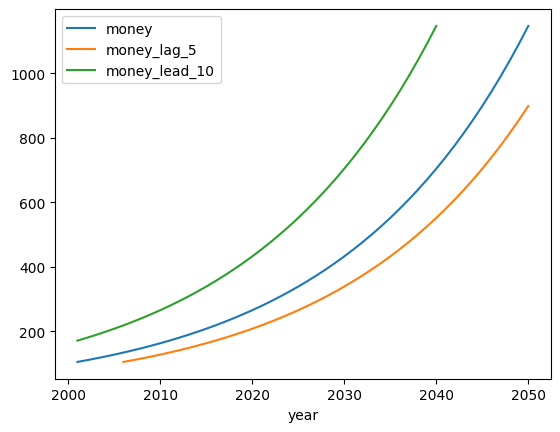

In [30]:
money["money_lag_5"] = money["money"].shift(5)
money["money_lead_10"] = money["money"].shift(-10)
money.set_index("year").plot();

# 统计摘要

##分位数

The quantile at x% is the value that x% of values are below and (100-x)% are above.

In [32]:
money["money"]

0      105.000000
1      110.250000
2      115.762500
3      121.550625
4      127.628156
5      134.009564
6      140.710042
7      147.745544
8      155.132822
9      162.889463
10     171.033936
11     179.585633
12     188.564914
13     197.993160
14     207.892818
15     218.287459
16     229.201832
17     240.661923
18     252.695020
19     265.329771
20     278.596259
21     292.526072
22     307.152376
23     322.509994
24     338.635494
25     355.567269
26     373.345632
27     392.012914
28     411.613560
29     432.194238
30     453.803949
31     476.494147
32     500.318854
33     525.334797
34     551.601537
35     579.181614
36     608.140694
37     638.547729
38     670.475115
39     703.998871
40     739.198815
41     776.158756
42     814.966693
43     855.715028
44     898.500779
45     943.425818
46     990.597109
47    1040.126965
48    1092.133313
49    1146.739979
Name: money, dtype: float64

In [31]:
money["money"].quantile(0.25)

190.92197566022773

In [33]:
money["money"].quantile([0, 0.25, 0.5, 0.75])

0.00    105.000000
0.25    190.921976
0.50    347.101381
0.75    630.945970
Name: money, dtype: float64

## Spread

In [34]:
# sd 指的是标准差（standard deviation）
(flights.groupby(["origin", "dest"])
 .agg(
    distance_sd=("distance", lambda x: x.quantile(0.75) - x.quantile(0.25)),
    count=("distance", "count"),
)
 .query("distance_sd > 0")
 )

,,distance_sd,count
origin,dest,,
EWR,EGE,1.0,110
JFK,EGE,1.0,103


## Distributions

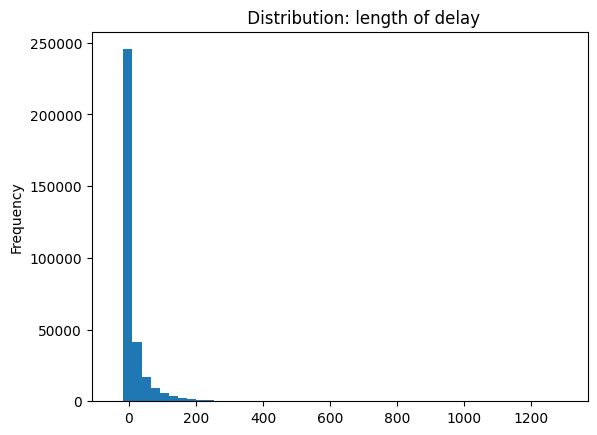

In [35]:
flights["dep_delay"].plot.hist(bins=50, title="         Distribution: length of delay");

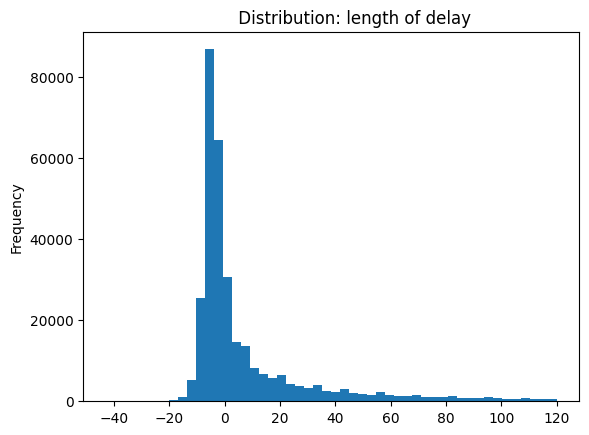

In [36]:
flights.query("dep_delay <= 120")["dep_delay"].plot.hist(
    bins=50, title="         Distribution: length of delay"
);